# DELA
## EDA | Onur & Bjorn

## Importing modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar

In [2]:
df = pd.read_csv("Data/Data_uitvaartregios_overlijdens_per_dag_vanaf2017tm2020.csv", sep = ";", encoding = "utf-8")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   omschrijving  25408 non-null  object
 1   mld_dat       25408 non-null  object
 2   Aantal        25408 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 595.6+ KB


,omschrijving,mld_dat,Aantal
0,Arnhem,31/12/2020,4
1,Breda,31/12/2020,5
2,Den Bosch,31/12/2020,8
3,Eindhoven,31/12/2020,9
4,Haaglanden,31/12/2020,5
...,...,...,...
25403,Tilburg,02/01/2017,6
25404,Twente/Achterhoek,02/01/2017,4
25405,Veluwe/Flevoland,02/01/2017,3
25406,West Brabant/Zeeland,02/01/2017,6


In [3]:
df.isnull().sum()

omschrijving    0
mld_dat         0
Aantal          0
dtype: int64

In [4]:
df.duplicated().sum()


0

In [5]:
df.columns = ["city", "date", "amount"]

In [6]:
df["date"] = pd.to_datetime(df.date)
#df["date"] = df["date"].dt.strftime("%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   plaats  25408 non-null  object        
 1   datum   25408 non-null  datetime64[ns]
 2   aantal  25408 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 595.6+ KB


In [7]:
print("Max = ", df["date"].max(), "Min = ", df["date"].min())

Max =  2020-12-31 00:00:00 Min =  2017-01-02 00:00:00


In [8]:
df["maand"] = df["date"].dt.month
df["jaar"] = df["date"].dt.year
df["day"] = df["date"].dt.day
df["wkday"] = df["date"].dt.strftime("%A")
df

,plaats,datum,aantal,maand,jaar,day,wkday
0,Arnhem,2020-12-31,4,12,2020,31,Thursday
1,Breda,2020-12-31,5,12,2020,31,Thursday
2,Den Bosch,2020-12-31,8,12,2020,31,Thursday
3,Eindhoven,2020-12-31,9,12,2020,31,Thursday
4,Haaglanden,2020-12-31,5,12,2020,31,Thursday
...,...,...,...,...,...,...,...
25403,Tilburg,2017-02-01,6,2,2017,1,Wednesday
25404,Twente/Achterhoek,2017-02-01,4,2,2017,1,Wednesday
25405,Veluwe/Flevoland,2017-02-01,3,2,2017,1,Wednesday
25406,West Brabant/Zeeland,2017-02-01,6,2,2017,1,Wednesday


In [9]:
df["city"] = df["city"].str.strip()

In [10]:
df.describe(include="all")

<ipython-input-10-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,plaats,datum,aantal,maand,jaar,day,wkday
count,25408,25408,25408.00000,25408.000000,25408.000000,25408.000000,25408
unique,20,1460,NaN,NaN,NaN,NaN,7
top,Ondernemersgebied,2020-05-18 00:00:00,NaN,NaN,NaN,NaN,Wednesday
freq,1460,20,NaN,NaN,NaN,NaN,3645
first,NaN,2017-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.51106,6.524638,2018.522749,15.749764,NaN
std,NaN,NaN,2.62574,3.454969,1.115145,8.793250,NaN
min,NaN,NaN,1.00000,1.000000,2017.000000,1.000000,NaN
25%,NaN,NaN,3.00000,4.000000,2018.000000,8.000000,NaN


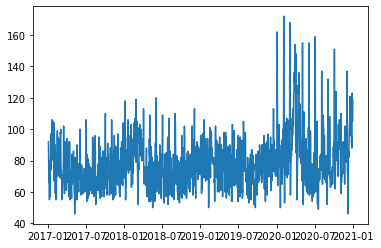

In [11]:
g = df.groupby("date", as_index = False).sum()
g

plt.plot(g["date"], g["amount"])
plt.show()

In [12]:
g2 = df.groupby(["jaar", "maand"], as_index = False)["amount"].sum()
g2



,jaar,maand,aantal
0,2017,1,2499
1,2017,2,2258
2,2017,3,2273
3,2017,4,2152
4,2017,5,2131
5,2017,6,2094
6,2017,7,2214
7,2017,8,2199
8,2017,9,2191
9,2017,10,2248


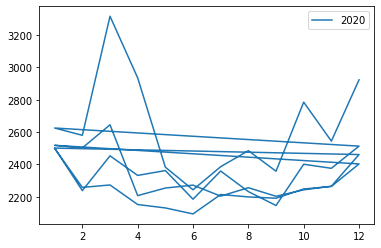

In [13]:
plt.plot(g2["maand"], g2["amount"], label = g2["jaar"])
plt.legend(df["jaar"])

In [14]:
g2 = g2.pivot(index = "maand", columns = "jaar", values = "amount")
print(g2)

jaar   2017  2018  2019  2020
maand                        
1      2499  2518  2501  2625
2      2258  2502  2238  2580
3      2273  2645  2453  3316
4      2152  2207  2332  2935
5      2131  2254  2362  2383
6      2094  2272  2185  2243
7      2214  2204  2359  2386
8      2199  2256  2232  2485
9      2191  2203  2146  2358
10     2248  2243  2401  2785
11     2264  2265  2376  2544
12     2403  2461  2513  2923


<AxesSubplot:xlabel='maand'>

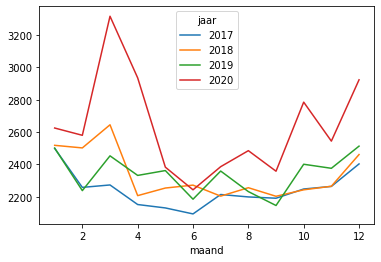

In [15]:
g2.plot()

In [16]:
g3 = df.groupby("city", as_index = False)["amount"].sum()
g3

,plaats,aantal
0,Amersfoort-Flevoland,132
1,Arnhem,6197
2,Breda,6360
3,Den Bosch,6183
4,Eindhoven,7431
5,Haaglanden,4165
6,Kempenland,6268
7,Midden Limburg,6216
8,Midden Nederland,5929
9,NOORD,2474


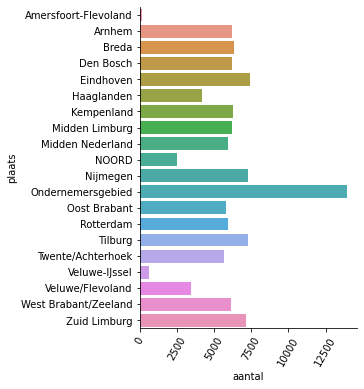

In [17]:
sns.catplot(kind = "bar", y = "city", x = "amount", data = g3)
plt.xticks(rotation=60)
plt.show()

In [18]:
dftest = df["city"] == "Breda"
df2 = df[dftest]
df2
#monumenttrees = trees["STATUS"] == "Monumentaal"
#monument = trees[monumenttrees]

,plaats,datum,aantal,maand,jaar,day,wkday
1,Breda,2020-12-31,5,12,2020,31,Thursday
19,Breda,2020-12-30,3,12,2020,30,Wednesday
37,Breda,2020-12-29,3,12,2020,29,Tuesday
54,Breda,2020-12-28,5,12,2020,28,Monday
71,Breda,2020-12-27,2,12,2020,27,Sunday
...,...,...,...,...,...,...,...
25324,Breda,2017-06-01,5,6,2017,1,Thursday
25341,Breda,2017-05-01,7,5,2017,1,Monday
25358,Breda,2017-04-01,4,4,2017,1,Saturday
25375,Breda,2017-03-01,6,3,2017,1,Wednesday


In [19]:
g4 = df.groupby("wkday", as_index = False)["amount"].sum()

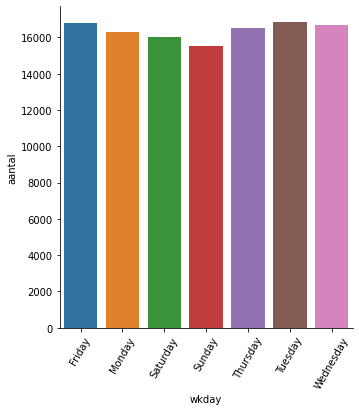

In [20]:
sns.catplot(kind = "bar", y = "amount", x = "wkday", data = g4, ci = None)
plt.xticks(rotation=60)
plt.show()

In [21]:
g5 = df.groupby(["date", "city"], as_index = False)["amount"].sum()
g5

,datum,plaats,aantal
0,2017-01-02,Arnhem,7
1,2017-01-02,Breda,4
2,2017-01-02,Den Bosch,4
3,2017-01-02,Eindhoven,7
4,2017-01-02,Haaglanden,2
...,...,...,...
25403,2020-12-31,Tilburg,8
25404,2020-12-31,Twente/Achterhoek,4
25405,2020-12-31,Veluwe-IJssel,3
25406,2020-12-31,West Brabant/Zeeland,5


In [22]:
g5 = g5.pivot(index = "date", columns = "city", values = "amount").fillna(0)
print(g5)

plaats      Amersfoort-Flevoland  Arnhem  Breda  Den Bosch  Eindhoven  \
datum                                                                   
2017-01-02                   0.0     7.0    4.0        4.0        7.0   
2017-01-03                   0.0     1.0    4.0        3.0       10.0   
2017-01-04                   0.0     4.0    3.0        3.0        8.0   
2017-01-05                   0.0     3.0    4.0        5.0        6.0   
2017-01-06                   0.0     2.0    6.0        5.0        0.0   
...                          ...     ...    ...        ...        ...   
2020-12-27                   0.0     4.0    2.0        7.0        6.0   
2020-12-28                   0.0     6.0    5.0       12.0        9.0   
2020-12-29                   0.0     4.0    3.0        8.0       11.0   
2020-12-30                   0.0     4.0    3.0        6.0        8.0   
2020-12-31                   0.0     4.0    5.0        8.0        9.0   

plaats      Haaglanden  Kempenland  Midden Limburg

array([<AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>,
       <AxesSubplot:xlabel='datum'>, <AxesSubplot:xlabel='datum'>],
      dtype=object)

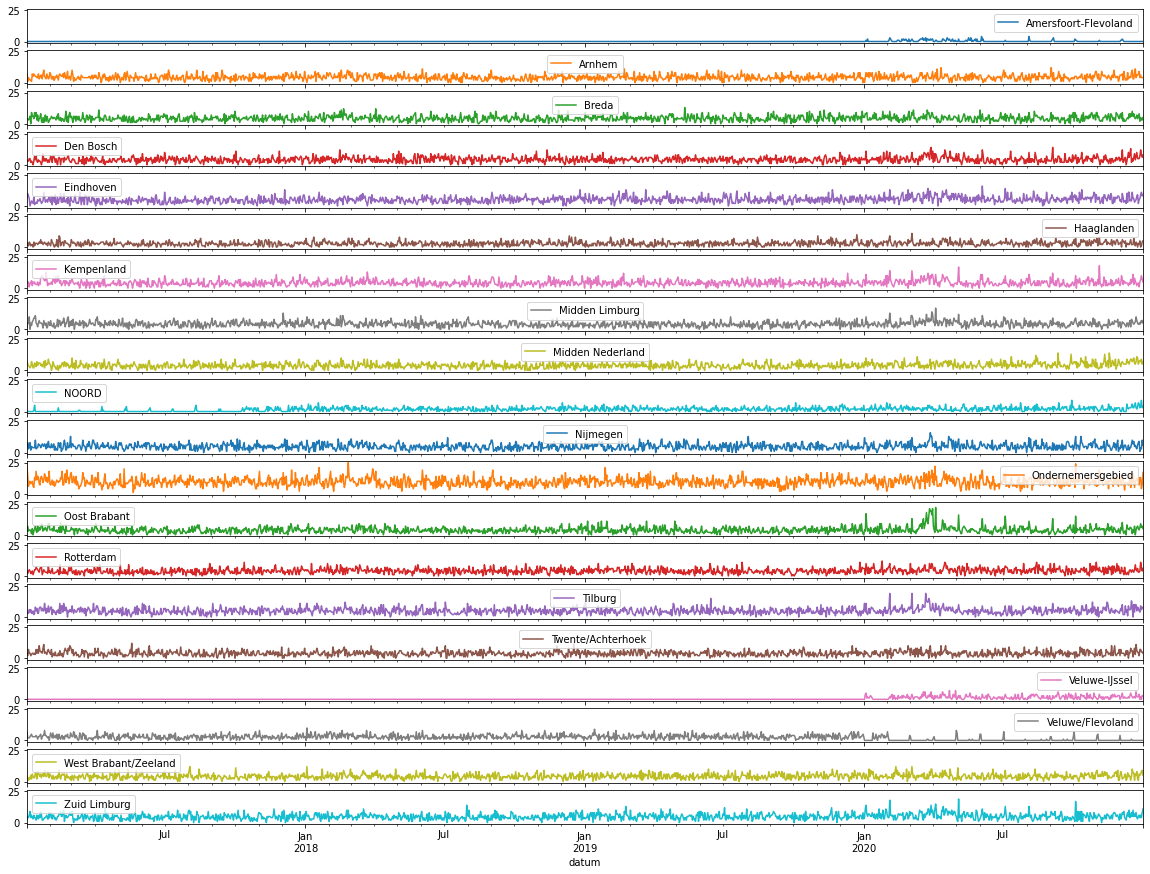

In [23]:
g5.plot(figsize = (20,15), subplots = True, sharey = True)


<AxesSubplot:xlabel='maand'>

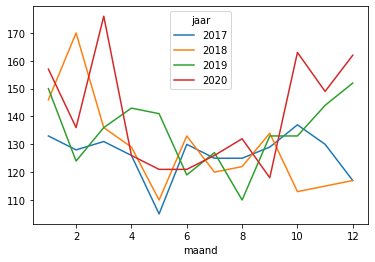

In [24]:
dfbreda = df[df["city"] == "Breda"]
dfbreda = dfbreda.groupby(["maand", "jaar"], as_index = False)["amount"].sum().pivot(index = "maand", columns = "jaar", values = "amount").fillna(0)
dfbreda.plot()